In [16]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days = 730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download("BTC-USD", start = start_date, end = end_date, progress = False)
data["Date"] = data.index
data = data[["Date","Open","High","Low","Close","Adj Close","Volume"]]
data.reset_index(drop = True, inplace = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-15,11768.697266,11963.203125,11768.697266,11865.698242,11865.698242,23354924400
1,2020-08-16,11866.685547,11934.901367,11737.188477,11892.803711,11892.803711,20583375490
2,2020-08-17,11895.658203,12359.056641,11806.696289,12254.402344,12254.402344,28227687027
3,2020-08-18,12251.895508,12335.707031,11954.525391,11991.233398,11991.233398,26043227672
4,2020-08-19,11990.884766,12028.923828,11687.333008,11758.283203,11758.283203,24502851117


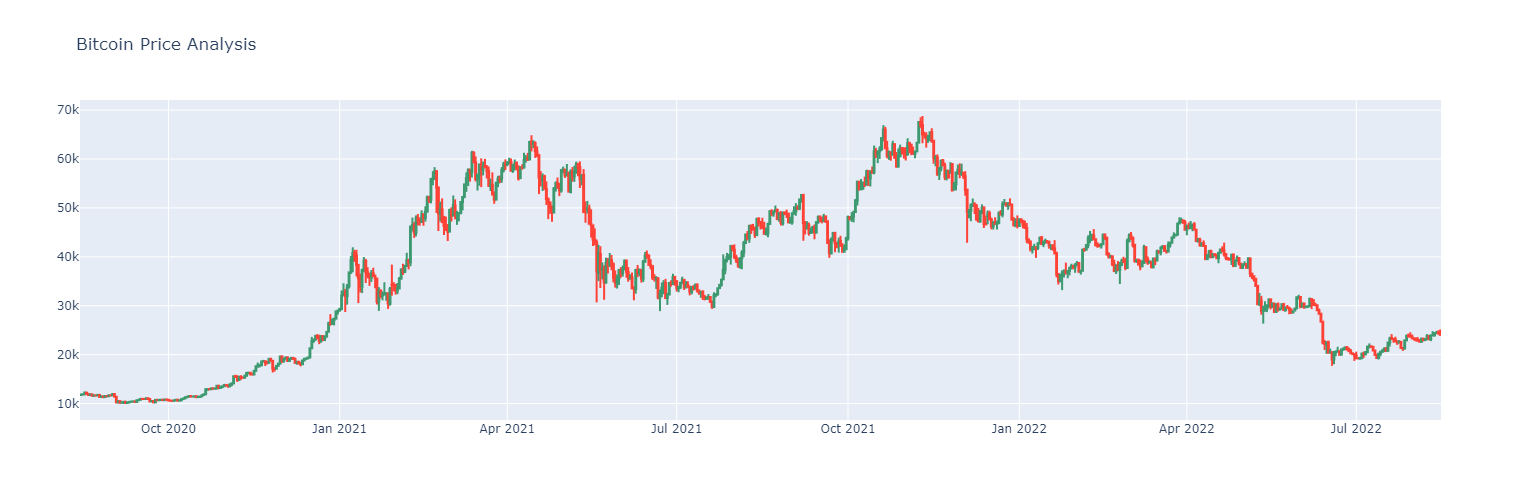

In [19]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Candlestick(x = data["Date"],
                                       open = data["Open"],
                                       high = data["High"],
                                       low = data["Low"],
                                       close = data["Close"])])
fig.update_layout(title = "Bitcoin Price Analysis", xaxis_rangeslider_visible = False, width = 800, height = 500)
fig.show()

In [22]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending = False))

Close        1.000000
Adj Close    1.000000
High         0.997741
Low          0.997371
Open         0.994873
Volume       0.230586
Name: Close, dtype: float64


In [24]:
!pip install autots

In [25]:
from autots import AutoTS
model = AutoTS(forecast_length = 30, frequency = "infer", ensemble = "simple")
model = model.fit(data, date_col = "Date", value_col = "Close", id_col = None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
22/22 [==============================] - 6s 3ms/step - loss: 0.4119
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4100
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4076
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4052
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4036
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4039
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4029
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4013
Epoch 9/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3999
Epoch 10/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4059
Epoch 11/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3991
Epoch 12/50
22/22 [==============================] - 0s 3ms/s

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 35 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 35: FBProphet
Model Number: 36 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 36: GluonTS
Model Number: 37 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 38 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 38: MultivariateRegression
Model Number: 39 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 39: DatepartRegression
Model Number: 40 with model SeasonalNaive in generation 0 of 10
Model Number: 41 with model DatepartRegression in generation 0 of 10
Model Number: 42 with model UnobservedComponents in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model ETS in generation 0 of 10
Model Number: 45 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 45: VECM
Model Number: 46 with model ARDL in generation 0 of 10
Model Number: 47 with model MultivariateMotif in generation 0 of 10
Model Number: 48 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 58 with model Theta in generation 0 of 10
Model Number: 59 with model UnivariateRegression in generation 0 of 10
Model Number: 60 with model ConstantNaive in generation 0 of 10
Model Number: 61 with model LastValueNaive in generation 0 of 10
Model Number: 62 with model AverageValueNaive in generation 0 of 10
Model Number: 63 with model GLS in generation 0 of 10
Model Number: 64 with model SeasonalNaive in generation 0 of 10
Model Number: 65 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 65: GLM
Model Number: 66 with model ETS in generation 0 of 10
Model Number: 67 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 67: FBProphet
Model Number: 68 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 68: Glu

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 81 with model ARDL in generation 0 of 10
Model Number: 82 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 82: VAR
Model Number: 83 with model WindowRegression in generation 0 of 10
Model Number: 84 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 84: GLM
Model Number: 85 with model NVAR in generation 0 of 10
Model Number: 86 with model LastValueNaive in generation 0 of 10
Model Number: 87 with model LastValueNaive in generation 0 of 10
Model Number: 88 with model LastValueNaive in generation 0 of 10
Model Number: 89 with model LastValueNaive in generation 0 of 10
Model Number: 90 with model UnivariateMotif in generation 0 of 10
Model Number: 91 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfini

C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning:

invalid value encountered in reduce



Model Number: 109 with model Theta in generation 0 of 10
Model Number: 110 with model ConstantNaive in generation 0 of 10
Model Number: 111 with model NVAR in generation 0 of 10
Model Number: 112 with model ConstantNaive in generation 0 of 10
Model Number: 113 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 113: FBProphet
Model Number: 114 with model ConstantNaive in generation 0 of 10
Model Number: 115 with model DatepartRegression in generation 0 of 10
Epoch 1/50
10/10 [==============================] - 6s 5ms/step - loss: 109.2288
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 103.4189
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 101.0292
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 103.6815
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 103.5687
Epoch 6/50
10/10 [==============================] - 0s 5ms/s

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 140 with model MultivariateMotif in generation 0 of 10
Model Number: 141 with model ConstantNaive in generation 0 of 10
Model Number: 142 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 143 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 143: ARDL
Model Number: 144 with model DatepartRegression in generation 0 of 10
Model Number: 145 with model NVAR in generation 0 of 10
Model Number: 146 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 146: VAR
Model Number: 147 with model SeasonalNaive in generation 0 of 10
Model Number: 148 with model GLS in generation 0 of 10
Model Number: 149 with 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning:

All-NaN slice encountered

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning:

All-NaN slice encountered

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 175 with model Theta in generation 1 of 10
Model Number: 176 with model SectionalMotif in generation 1 of 10
Model Number: 177 with model ETS in generation 1 of 10
Model Number: 178 with model UnobservedComponents in generation 1 of 10
Model Number: 179 with model UnobservedComponents in generation 1 of 10
Model Number: 180 with model NVAR in generation 1 of 10
Model Number: 181 with model NVAR in generation 1 of 10
Model Number: 182 with model ARDL in generation 1 of 10
Model Number: 183 with model NVAR in generation 1 of 10
Model Number: 184 with model UnivariateMotif in generation 1 of 10
Model Number: 185 with model Theta in generation 1 of 10
Model Number: 186 with model ConstantNaive in generation 1 of 10
Model Number: 187 with model ETS in generation 1 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:330: RuntimeWarning:

divide by zero encountered in power



Model Number: 188 with model SectionalMotif in generation 1 of 10
Model Number: 189 with model Theta in generation 1 of 10
Model Number: 190 with model UnivariateMotif in generation 1 of 10
Model Number: 191 with model SectionalMotif in generation 1 of 10
Model Number: 192 with model DatepartRegression in generation 1 of 10
Epoch 1/50
22/22 [==============================] - 7s 3ms/step - loss: 0.0880
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 9/50
22/22 [========================

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 211 with model ETS in generation 1 of 10
Model Number: 212 with model UnobservedComponents in generation 1 of 10
Model Number: 213 with model UnobservedComponents in generation 1 of 10
Model Number: 214 with model UnobservedComponents in generation 1 of 10
Model Number: 215 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 216 with model LastValueNaive in generation 1 of 10
Model Number: 217 with model AverageValueNaive in generation 1 of 10
Model Number: 218 with model SectionalMotif in generation 1 of 10
Model Number: 219 with model UnivariateMotif in generation 1 of 10
Model Number: 220 with model SeasonalNaive in generation 1 of 10
Model Number: 221 with model ETS in generation 1 of 10
Model Number: 222 with model DatepartRegression i

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 229 with model Theta in generation 1 of 10
Model Number: 230 with model LastValueNaive in generation 1 of 10
Model Number: 231 with model NVAR in generation 1 of 10
Model Number: 232 with model SeasonalNaive in generation 1 of 10
Model Number: 233 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 233: NVAR


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 234 with model ETS in generation 1 of 10
Model Number: 235 with model NVAR in generation 1 of 10
Model Number: 236 with model NVAR in generation 1 of 10
Model Number: 237 with model WindowRegression in generation 1 of 10
Model Number: 238 with model LastValueNaive in generation 1 of 10
Model Number: 239 with model ConstantNaive in generation 1 of 10
Model Number: 240 with model ETS in generation 1 of 10
Model Number: 241 with model DatepartRegression in generation 1 of 10
Model Number: 242 with model MultivariateRegression in generation 1 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.848e+10, tolerance: 1.597e+07

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed: 

Model Number: 243 with model UnivariateRegression in generation 1 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 244 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 244: NVAR
Model Number: 245 with model AverageValueNaive in generation 1 of 10
Model Number: 246 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 247 with model GLM in generation 1 of 10
Model Number: 248 with model AverageValueNaive in generation 1 of 10
Model Number: 249 with model SeasonalNaive in generation 1 of 10
Model Number: 250 with model GLS in generation 1 of 10
Model Number: 251 with model SeasonalNaive in generation 1 of 10
Model Number: 252 with model ETS in generation 1 of 10
Model Number: 253 with model UnobservedComponents in generation 1 of 10
Model Number: 254 with model MultivariateMotif in generation 1 of 10
Model Number: 255 with model SeasonalNaive in generation 1 of 10
Model Number: 256 with model LastValueNaive in generation 1 of 10
Model Number: 257 with model AverageValueNaive in generation 1 of 10
Model Number: 258 with model UnobservedComponents in generation 1 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 259 with model UnivariateRegression in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 259: UnivariateRegression
Model Number: 260 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 260: UnobservedComponents
Model Number: 261 with model NVAR in generation 1 of 10
Model Number: 262 with model DatepartRegression in generation 1 of 10
Model Number: 263 with model ConstantNaive in generation 1 of 10
Model Number: 264 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s


Model Number: 265 with model AverageValueNaive in generation 1 of 10
Model Number: 266 with model ConstantNaive in generation 1 of 10
Model Number: 267 with model UnivariateMotif in generation 1 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 268 with model SectionalMotif in generation 1 of 10
Model Number: 269 with model UnobservedComponents in generation 1 of 10
Model Number: 270 with model LastValueNaive in generation 1 of 10
Model Number: 271 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 271: UnobservedComponents
Model Number: 272 with model LastValueNaive in generation 1 of 10
Model Number: 273 with model ETS in generation 1 of 10
Model Number: 274 with model AverageValueNaive in generation 1 of 10
Model Number: 275 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on 0 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 276 with model ConstantNaive in generation 1 of 10
Model Number: 277 wit

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



New Generation: 2 of 10
Model Number: 280 with model UnobservedComponents in generation 2 of 10
Model Number: 281 with model SectionalMotif in generation 2 of 10
Model Number: 282 with model WindowRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 283 with model ETS in generation 2 of 10
Model Number: 284 with model SeasonalNaive in generation 2 of 10
Model Number: 285 with model MultivariateRegression in generation 2 of 10
Model Number: 286 with model ARDL in generation 2 of 10
Model Number: 287 with model Theta in generation 2 of 10
Model Number: 288 with model ConstantNaive in generation 2 of 10
Model Number: 289 with model ConstantNaive in generation 2 of 10
Model Number: 290 with model SectionalMotif in generation 2 of 10
Model Number: 291 with model ConstantNaive in generation 2 of 10
Model Number: 292 with model NVAR in generation 2 of 10
Model Number: 293 with model ConstantNaive in generation 2 of 10
Model Number: 294 with model LastValueNaive in generation 2 of 10
Model Number: 295 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 296 with model UnivariateRegression in generation 2 of 10
Model Number: 297 with model LastValueNaive in generation 2 of 10
Model Number: 298 with model ConstantNaive in generation 2 of 10
Model Number: 299 with model MultivariateMotif in generation 2 of 10
Model Number: 300 with model LastValueNaive in generation 2 of 10
Model Number: 301 with model Theta in generation 2 of 10
Model Number: 302 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 302: MultivariateRegression
Model Number: 303 with model AverageValueNaive in generation 2 of 10
Model Number: 304 with model SectionalMotif in generation 2 of 10
Model Number: 305 with model ETS in generation 2 of 10
Model Number: 306 with model ETS in generation 2 of 10
Model Number: 307 with model Theta in generation 2 of 10
Model Number: 308 with model ConstantNaive in generation 2 of 10
Model Number: 309 with model LastValueNaive in generatio

C:\Users\Asus\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning:

All-NaN slice encountered

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s


Model Number: 313 with model LastValueNaive in generation 2 of 10
Model Number: 314 with model LastValueNaive in generation 2 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 315 with model WindowRegression in generation 2 of 10
Model Number: 316 with model GLS in generation 2 of 10
Model Number: 317 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 317: NVAR
Model Number: 318 with model MultivariateMotif in generation 2 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 319 with model ARDL in generation 2 of 10
Model Number: 320 with model SectionalMotif in generation 2 of 10
Model Number: 321 with model NVAR in generation 2 of 10
Model Number: 322 with model UnivariateMotif in generation 2 of 10
Model Number: 323 with model UnobservedComponents in generation 2 of 10
Model Number: 324 with model SectionalMotif in generation 2 of 10
Model Number: 325 with model MultivariateRegression in generation 2 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 326 with model UnivariateRegression in generation 2 of 10
Model Number: 327 with model Theta in generation 2 of 10
Model Number: 328 with model AverageValueNaive in generation 2 of 10
Model Number: 329 with model LastValueNaive in generation 2 of 10
Model Number: 330 with model MultivariateRegression in generation 2 of 10
Model Number: 331 with model UnobservedComponents in generation 2 of 10
Model Number: 332 with model LastValueNaive in generation 2 of 10
Model Number: 333 with model Theta in generation 2 of 10
Model Number: 334 with model DatepartRegression in generation 2 of 10
Model Number: 335 with model Theta in generation 2 of 10
Model Number: 336 with model NVAR in generation 2 of 10
Model Number: 337 with model UnobservedComponents in generation 2 of 10
Model Number: 338 with model LastValueNaive in generation 2 of 10
Model Number: 339 with model ARDL in generation 2 of 10
Model Number: 340 with model Theta in generation 2 of 10
Model Number: 341 with model NVAR

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 349 with model ConstantNaive in generation 2 of 10


[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 350 with model WindowRegression in generation 2 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 351 with model ARDL in generation 2 of 10
Model Number: 352 with model UnivariateRegression in generation 2 of 10
Model Number: 353 with model NVAR in generation 2 of 10
Model Number: 354 with model LastValueNaive in generation 2 of 10
Model Number: 355 with model ARDL in generation 2 of 10
Model Number: 356 with model UnobservedComponents in generation 2 of 10
Model Number: 357 with model AverageValueNaive in generation 2 of 10
Model Number: 358 with model NVAR in generation 2 of 10
Model Number: 359 with model DatepartRegression in generation 2 of 10
Model Number: 360 with model SeasonalNaive in generation 2 of 10
Model Number: 361 with model SeasonalNaive in generation 2 of 10
Model Number: 362 with model SectionalMotif in generation 2 of 10
Model Number: 363 with model MultivariateRegression in generation 2 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 364 with model ETS in generation 2 of 10
Model Number: 365 with model UnivariateMotif in generation 2 of 10
Model Number: 366 with model NVAR in generation 2 of 10
Model Number: 367 with model MultivariateMotif in generation 2 of 10
Model Number: 368 with model AverageValueNaive in generation 2 of 10
Model Number: 369 with model ConstantNaive in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 369: ConstantNaive
Model Number: 370 with model WindowRegression in generation 2 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Model Number: 371 with model SeasonalNaive in generation 2 of 10
Model Number: 372 with model UnobservedComponents in generation 2 of 10
Model Number: 373 with model ETS in generation 2 of 10
Model Number: 374 with model UnobservedComponents in generation 2 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 375 with model Theta in generation 2 of 10
Model Number: 376 with model ConstantNaive in generation 2 of 10
Model Number: 377 with model MultivariateMotif in generation 2 of 10
Model Number: 378 with model AverageValueNaive in generation 2 of 10
Model Number: 379 with model LastValueNaive in generation 2 of 10
Model Number: 380 with model NVAR in generation 2 of 10
Model Number: 381 with model Theta in generation 2 of 10
Model Number: 382 with model ETS in generation 2 of 10
Model Number: 383 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 383: LastValueNaive
Model Number: 384 with model AverageValueNaive in generation 2 of 10
Model Number: 385 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError('kth(=20) out of bounds (14)') in model 385: SectionalMotif
Model Number: 386 with model ETS in generation 2 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:330: RuntimeWarning:

divide by zero encountered in power



Model Number: 387 with model NVAR in generation 2 of 10
Model Number: 388 with model SectionalMotif in generation 2 of 10
Model Number: 389 with model SeasonalNaive in generation 2 of 10
New Generation: 3 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 390 with model SectionalMotif in generation 3 of 10
Model Number: 391 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (3)') in model 391: SectionalMotif
Model Number: 392 with model MultivariateMotif in generation 3 of 10
Model Number: 393 with model NVAR in generation 3 of 10
Model Number: 394 with model UnobservedComponents in generation 3 of 10
Model Number: 395 with model NVAR in generation 3 of 10
Model Number: 396 with model Theta in generation 3 of 10
Model Number: 397 with model Theta in generation 3 of 10
Model Number: 398 with model LastValueNaive in generation 3 of 10
Model Number: 399 with model ConstantNaive in generation 3 of 10
Model Number: 400 with model MultivariateMotif in generation 3 of 10
Model Number: 401 with model MultivariateRegression in generation 3 of 10
Model Number: 402 with model UnobservedComponents in generation 3 of 10
Model Number: 403 with model UnobservedComponents in generation 

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\impute.py:53: RuntimeWarning:

Mean of empty slice



Model Number: 420 with model MultivariateRegression in generation 3 of 10
Model Number: 421 with model GLS in generation 3 of 10
Model Number: 422 with model NVAR in generation 3 of 10
Model Number: 423 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 423: SeasonalNaive
Model Number: 424 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 425 with model ETS in generation 3 of 10
Model Number: 426 with model WindowRegression in generation 3 of 10
Model Number: 427 with model UnivariateMotif in generation 3 of 10
Model Number: 428 with model MultivariateRegression in generation 3 of 10
Model Number: 429 with model Theta in generation 3 of 10
Model Number: 430 with model LastValueNaive in generation 3 of 10
Model Number: 431 with model SectionalMotif in generation 3 of 10
Model Number: 432 with model WindowRegression in generation 3 of 10
Model Number: 433 with model SeasonalNaive in generation 3 of 10
Model Number: 434 with model DatepartRegression in generation 3 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\

Model Number: 435 with model SectionalMotif in generation 3 of 10
Model Number: 436 with model NVAR in generation 3 of 10
Model Number: 437 with model NVAR in generation 3 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Asus\anaconda3\lib\

Model Number: 438 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 439 with model DatepartRegression in generation 3 of 10
Model Number: 440 with model ARDL in generation 3 of 10
Model Number: 441 with model ConstantNaive in generation 3 of 10
Model Number: 442 with model LastValueNaive in generation 3 of 10
Model Number: 443 with model AverageValueNaive in generation 3 of 10
Model Number: 444 with model UnobservedComponents in generation 3 of 10
Model Number: 445 with model SeasonalNaive in generation 3 of 10
Model Number: 446 with model SectionalMotif in generation 3 of 10
Model Number: 447 with model ARDL in generation 3 of 10
Model Number: 448 with model ETS in generation 3 of 10
Model Number: 449 with model AverageValueNaive in generation 3 of 10
Model Number: 450 with model NVAR in generation 3 of 10
Model Number: 451 with model UnivariateMotif in generation 3 of 10
Model Number: 452 with model AverageValueNaive in generation 3 of 10
Model Number: 453 with model LastValueNaive in generation 3 of 10
Model Number: 454 with model Aver

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 465 with model DatepartRegression in generation 3 of 10
Epoch 1/50
18/18 [==============================] - 3s 30ms/step - loss: 55.0463 - val_loss: 19.5837
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 45.5655 - val_loss: 6.7372
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 44.4684 - val_loss: 17.4554
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 41.4907 - val_loss: 20.9960
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 42.9442 - val_loss: 32.6184
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 43.2599 - val_loss: 14.5514
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 42.6924 - val_loss: 0.3914
Epoch 8/50
18/18 [==============================] - 0s 3ms/step - loss: 42.2880 - val_loss: 18.0672
Epoch 9/50
18/18 [==============================] - 0s 3ms/step - loss: 39.5287 - val_loss: 10.3336
Epoch 10/50
18/18 [============

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 474 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 475 with model Theta in generation 3 of 10
Model Number: 476 with model SectionalMotif in generation 3 of 10
Model Number: 477 with model ARDL in generation 3 of 10
Model Number: 478 with model SectionalMotif in generation 3 of 10
Model Number: 479 with model WindowRegression in generation 3 of 10
Epoch 1/50
34/34 [==============================] - 8s 22ms/step - loss: 107.3614 - val_loss: 95.4386
Epoch 2/50
34/34 [==============================] - 0s 7ms/step - loss: 99.2331 - val_loss: 93.5182
Epoch 3/50
34/34 [==============================] - 0s 7ms/step - loss: 97.0421 - val_loss: 90.9761
Epoch 4/50
34/34 [==============================] - 0s 7ms/step - loss: 95.0808 - val_loss: 91.1848
Epoch 5/50
34/34 [==============================] - 0s 7ms/step - loss: 92.6575 - val_loss: 90.6409
Epoch 6/50
34/34 [==============================] - 0s 7ms/step - loss: 91.1351 - val_loss: 90.7270
Epoch 7/50
34/34 [==============================] - 0s 7ms/step - loss: 89.4726 - val

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 483 with model Theta in generation 3 of 10
Model Number: 484 with model ConstantNaive in generation 3 of 10
Model Number: 485 with model UnivariateRegression in generation 3 of 10
Model Number: 486 with model WindowRegression in generation 3 of 10
Model Number: 487 with model GLS in generation 3 of 10
Model Number: 488 with model SectionalMotif in generation 3 of 10
Model Number: 489 with model SectionalMotif in generation 3 of 10
Model Number: 490 with model ETS in generation 3 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on Close with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 491 with model UnobservedComponents in generation 3 of 10
Model Number: 492 with model AverageValueNaive in generation 3 of 10
Model Number: 493 with model ARDL in generation 3 of 10
Template Eval Erro

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 500 with model UnivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 500: UnivariateRegression
Model Number: 501 with model UnobservedComponents in generation 4 of 10
Model Number: 502 with model NVAR in generation 4 of 10
Model Number: 503 with model SectionalMotif in generation 4 of 10
Model Number: 504 with model ARDL in generation 4 of 10
Model Number: 505 with model ConstantNaive in generation 4 of 10
Model Number: 506 with model Theta in generation 4 of 10
Model Number: 507 with model ConstantNaive in generation 4 of 10
Model Number: 508 with model Theta in generation 4 of 10
Model Number: 509 with model MultivariateRegression in generation 4 of 10
Model Number: 510 with model ConstantNaive in generation 4 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 510: ConstantNaive
Model Number: 511 with model UnobservedComponents in generation 4 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning:

All-NaN slice encountered

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning:

All-NaN slice encountered

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 515 with model ARDL in generation 4 of 10
Model Number: 516 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 516: WindowRegression
Model Number: 517 with model NVAR in generation 4 of 10
Model Number: 518 with model MultivariateMotif in generation 4 of 10
Model Number: 519 with model Theta in generation 4 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\Asus\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning:

All-NaN slice encountered

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 519: Theta
Model Number: 520 with model UnivariateRegression in generation 4 of 10
Model Number: 521 with model WindowRegression in generation 4 of 10
Model Number: 522 with model NVAR in generation 4 of 10
Model Number: 523 with model NVAR in generation 4 of 10


C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.


Model Number: 524 with model WindowRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | 

Model Number: 525 with model AverageValueNaive in generation 4 of 10
Model Number: 526 with model SeasonalNaive in generation 4 of 10


[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 527 with model ARDL in generation 4 of 10
Model Number: 528 with model Theta in generation 4 of 10
Model Number: 529 with model SeasonalNaive in generation 4 of 10
Model Number: 530 with model ConstantNaive in generation 4 of 10
Model Number: 531 with model ARDL in generation 4 of 10
Model Number: 532 with model LastValueNaive in generation 4 of 10
Model Number: 533 with model NVAR in generation 4 of 10
Model Number: 534 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 534: DatepartRegression
Model Number: 535 with model SectionalMotif in generation 4 of 10
Model Number: 536 with model ARDL in generation 4 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 537 with model UnobservedComponents in generation 4 of 10
Model Number: 538 with model NVAR in generation 4 of 10
Model Number: 539 with model LastValueNaive in generation 4 of 10
Model Number: 540 with model MultivariateRegression in generation 4 of 10
Model Number: 541 with model LastValueNaive in generation 4 of 10
Model Number: 542 with model ConstantNaive in generation 4 of 10
Model Number: 543 with model ETS in generation 4 of 10
Model Number: 544 with model NVAR in generation 4 of 10
Model Number: 545 with model ETS in generation 4 of 10
Model Number: 546 with model GLM in generation 4 of 10
Model Number: 547 with model MultivariateRegression in generation 4 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend 

Model Number: 548 with model ETS in generation 4 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 549 with model ARDL in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 549: ARDL
Model Number: 550 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 551 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 551: LastValueNaive
Model Number: 552 with model ConstantNaive in generation 4 of 10
Model Number: 553 with model SectionalMotif in generation 4 of 10
Model Number: 554 with model ETS in generation 4 of 10
Model Number: 555 with model ARDL in generation 4 of 10
Model Number: 556 with model UnivariateRegression in generation 4 of 10
Model Number: 557 with model Theta in generation 4 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 558 with model Theta in generation 4 of 10
Model Number: 559 with model Theta in generation 4 of 10
Model Number: 560 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 560: DatepartRegression
Model Number: 561 with model Theta in generation 4 of 10
Model Number: 562 with model LastValueNaive in generation 4 of 10
Model Number: 563 with model ConstantNaive in generation 4 of 10
Model Number: 564 with model UnivariateMotif in generation 4 of 10
Model Number: 565 with model MultivariateMotif in generation 4 of 10
Model Number: 566 with model NVAR in generation 4 of 10
Model Number: 567 with model ARDL in generation 4 of 10
Model Number: 568 with model UnivariateRegression in generation 4 of 10
Model Number: 569 with model SectionalMotif in generation 4 of 10
Model Number: 570 with model WindowRegression in generation 4 of 10
Model Number: 571 with model AverageValueNaive in ge

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 575 with model ETS in generation 4 of 10
Model Number: 576 with model SectionalMotif in generation 4 of 10
Model Number: 577 with model NVAR in generation 4 of 10
Model Number: 578 with model Theta in generation 4 of 10
Model Number: 579 with model SectionalMotif in generation 4 of 10
Model Number: 580 with model SectionalMotif in generation 4 of 10
Model Number: 581 with model NVAR in generation 4 of 10
Model Number: 582 with model LastValueNaive in generation 4 of 10
Model Number: 583 with model ConstantNaive in generation 4 of 10
Model Number: 584 with model WindowRegression in generation 4 of 10
Model Number: 585 with model SectionalMotif in generation 4 of 10
Model Number: 586 with model NVAR in generation 4 of 10
Model Number: 587 with model AverageValueNaive in generation 4 of 10
Model Number: 588 with model ConstantNaive in generation 4 of 10
Model Number: 589 with model NVAR in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 592 with model ARDL in generation 4 of 10
Model Number: 593 with model AverageValueNaive in generation 4 of 10
Model Number: 594 with model Theta in generation 4 of 10
Model Number: 595 with model UnobservedComponents in generation 4 of 10
Model Number: 596 with model ARDL in generation 4 of 10
Model Number: 597 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 597: AverageValueNaive
Model Number: 598 with model ConstantNaive in generation 4 of 10
Model Number: 599 with model MultivariateMotif in generation 4 of 10
Model Number: 600 with model Theta in generation 4 of 10
Model Number: 601 with model SeasonalNaive in generation 4 of 10
Model Number: 602 with model UnobservedComponents in generation 4 of 10
Model Number: 603 with model SectionalMotif in generation 4 of 10
Model Number: 604 with model SeasonalNaive in generation 4 of 10
Model Number: 605 with model UnivariateRegression in generation 4

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 613 with model MultivariateRegression in generation 5 of 10
Model Number: 614 with model DatepartRegression in generation 5 of 10
Model Number: 615 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 615: ARDL
Model Number: 616 with model ConstantNaive in generation 5 of 10
Model Number: 617 with model AverageValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 617: AverageValueNaive
Model Number: 618 with model SectionalMotif in generation 5 of 10
Model Number: 619 with model ConstantNaive in generation 5 of 10
Model Number: 620 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 620: LastValueNaive
Model Number: 621 with model SectionalMotif in generation 5 of 10
Model Number: 622 with model Theta in generation 5 of 10

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.




Model Number: 623 with model SectionalMotif in generation 5 of 10
Model Number: 624 with model NVAR in generation 5 of 10
Model Number: 625 with model ConstantNaive in generation 5 of 10
Model Number: 626 with model ARDL in generation 5 of 10
Model Number: 627 with model SectionalMotif in generation 5 of 10
Model Number: 628 with model LastValueNaive in generation 5 of 10
Model Number: 629 with model ARDL in generation 5 of 10
Model Number: 630 with model LastValueNaive in generation 5 of 10
Model Number: 631 with model LastValueNaive in generation 5 of 10
Model Number: 632 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 633 with model WindowRegression in generation 5 of 10
Model Number: 634 with model ConstantNaive in generation 5 of 10
Model Number: 635 with model LastValueNaive in generation 5 of 10
Model Number: 636 with model ConstantNaive in generation 5 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 637 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 637: ARDL
Model Number: 638 with model NVAR in generation 5 of 10
Model Number: 639 with model ETS in generation 5 of 10
Model Number: 640 with model NVAR in generation 5 of 10
Model Number: 641 with model SectionalMotif in generation 5 of 10
Model Number: 642 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 642: MultivariateRegression
Model Number: 643 with model MultivariateRegression in generation 5 of 10
Model Number: 644 with model WindowRegression in generation 5 of 10
Model Number: 645 with model UnivariateRegression in generation 5 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 645: UnivariateRegression
Model Number: 646 with model LastValueNa

C:\Users\Asus\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning:

Degrees of freedom <= 0 for slice



Model Number: 648 with model DatepartRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 648: DatepartRegression
Model Number: 649 with model DatepartRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 649: DatepartRegression
Model Number: 650 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 651 with model UnobservedComponents in generation 5 of 10


[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 652 with model AverageValueNaive in generation 5 of 10
Model Number: 653 with model Theta in generation 5 of 10
Model Number: 654 with model UnobservedComponents in generation 5 of 10
Model Number: 655 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 655: WindowRegression
Model Number: 656 with model MultivariateRegression in generation 5 of 10
Model Number: 657 with model AverageValueNaive in generation 5 of 10
Model Number: 658 with model WindowRegression in generation 5 of 10
Model Number: 659 with model ConstantNaive in generation 5 of 10
Model Number: 660 with model NVAR in generation 5 of 10
Model Number: 661 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 661: ARDL
Model Number: 662 with model LastValueNaive in generation 5 of 10
Model Number: 663 with model Th

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 678 with model Theta in generation 5 of 10
Model Number: 679 with model ARDL in generation 5 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 680 with model Theta in generation 5 of 10
Model Number: 681 with model MultivariateMotif in generation 5 of 10
Model Number: 682 with model SectionalMotif in generation 5 of 10
Model Number: 683 with model SeasonalNaive in generation 5 of 10
Model Number: 684 with model AverageValueNaive in generation 5 of 10
Model Number: 685 with model MultivariateMotif in generation 5 of 10
Model Number: 686 with model LastValueNaive in generation 5 of 10
Model Number: 687 with model ETS in generation 5 of 10
Model Number: 688 with model ConstantNaive in generation 5 of 10
Model Number: 689 with model SectionalMotif in generation 5 of 10
Model Number: 690 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 691 with model WindowRegression in generation 5 of 10
Model Number: 692 with model UnobservedComponents in generation 5 of 10
Model Number: 693 with 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 707 with model SectionalMotif in generation 6 of 10
Model Number: 708 with model AverageValueNaive in generation 6 of 10
Model Number: 709 with model Theta in generation 6 of 10
Model Number: 710 with model GLS in generation 6 of 10
Model Number: 711 with model Theta in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1187: RuntimeWarning:

All-NaN slice encountered

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Template Eval Error: ValueError('This function does not handle missing values') in model 711: Theta
Model Number: 712 with model UnobservedComponents in generation 6 of 10
Model Number: 713 with model MultivariateMotif in generation 6 of 10
Model Number: 714 with model ConstantNaive in generation 6 of 10
Model Number: 715 with model SeasonalNaive in generation 6 of 10
Model Number: 716 with model LastValueNaive in generation 6 of 10
Model Number: 717 with model GLS in generation 6 of 10
Model Number: 718 with model ARDL in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 719 with model NVAR in generation 6 of 10
Model Number: 720 with model SectionalMotif in generation 6 of 10
Model Number: 721 with model ARDL in generation 6 of 10
Model Number: 722 with model ETS in generation 6 of 10
Model Number: 723 with model NVAR in generation 6 of 10
Model Number: 724 with model ETS in generation 6 of 10
Model Number: 725 with model ETS in generation 6 of 10
Model Number: 726 with model LastValueNaive in generation 6 of 10
Model Number: 727 with model UnobservedComponents in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 728 with model MultivariateMotif in generation 6 of 10
Model Number: 729 with model Theta in generation 6 of 10
Template Eval Error: ValueError('This function does not handle missing values') in model 729: Theta
Model Number: 730 with model NVAR in generation 6 of 10
Model Number: 731 with model NVAR in generation 6 of 10
Model Number: 732 with model Theta in generation 6 of 10
Model Number: 733 with model NVAR in generation 6 of 10
Model Number: 734 with model MultivariateMotif in generation 6 of 10
Model Number: 735 with model DatepartRegression in generation 6 of 10
Model Number: 736 with model LastValueNaive in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 737 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 737: SectionalMotif
Model Number: 738 with model SeasonalNaive in generation 6 of 10
Model Number: 739 with model Theta in generation 6 of 10
Model Number: 740 with model ConstantNaive in generation 6 of 10
Model Number: 741 with model ConstantNaive in generation 6 of 10
Model Number: 742 with model ARDL in generation 6 of 10
Model Number: 743 with model UnivariateMotif in generation 6 of 10
Model Number: 744 with model MultivariateRegression in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 745 with model ETS in generation 6 of 10
Model Number: 746 with model ConstantNaive in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations 

Model Number: 747 with model SectionalMotif in generation 6 of 10
Model Number: 748 with model Theta in generation 6 of 10
Model Number: 749 with model DatepartRegression in generation 6 of 10
Epoch 1/50
22/22 [==============================] - 4s 17ms/step - loss: 37395.4062
Epoch 2/50
22/22 [==============================] - 0s 16ms/step - loss: 37395.2148
Epoch 3/50
22/22 [==============================] - 0s 16ms/step - loss: 37395.0352
Epoch 4/50
22/22 [==============================] - 0s 16ms/step - loss: 37394.8555
Epoch 5/50
22/22 [==============================] - 0s 16ms/step - loss: 37394.6328
Epoch 6/50
22/22 [==============================] - 0s 17ms/step - loss: 37394.3750
Epoch 7/50
22/22 [==============================] - 0s 18ms/step - loss: 37394.0586
Epoch 8/50
22/22 [==============================] - 0s 17ms/step - loss: 37393.6641
Epoch 9/50
22/22 [==============================] - 0s 16ms/step - loss: 37393.2109
Epoch 10/50
22/22 [==============================] 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 753 with model LastValueNaive in generation 6 of 10
Model Number: 754 with model ARDL in generation 6 of 10
Model Number: 755 with model ETS in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 756 with model MultivariateMotif in generation 6 of 10
Model Number: 757 with model ConstantNaive in generation 6 of 10
Model Number: 758 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 758: SectionalMotif
Model Number: 759 with model GLM in generation 6 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 759: GLM
Model Number: 760 with model ConstantNaive in generation 6 of 10
Model Number: 761 with model Theta in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:330: RuntimeWarning:

divide by zero encountered in power



Model Number: 762 with model UnivariateRegression in generation 6 of 10
Model Number: 763 with model UnivariateRegression in generation 6 of 10
Model Number: 764 with model GLS in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 765 with model NVAR in generation 6 of 10
Model Number: 766 with model MultivariateRegression in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 767 with model Theta in generation 6 of 10
Model Number: 768 with model LastValueNaive in generation 6 of 10
Model Number: 769 with model WindowRegression in generation 6 of 10
Epoch 1/50
Template Eval Error: InvalidArgumentError() in model 769: WindowRegression
Model Number: 770 with model ARDL in generation 6 of 10
Model Number: 771 with model GLM in generation 6 of 10
Model Number: 772 with model WindowRegression in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning:

invalid value encountered in log



Model Number: 773 with model ARDL in generation 6 of 10
Model Number: 774 with model Theta in generation 6 of 10
Model Number: 775 with model AverageValueNaive in generation 6 of 10
Model Number: 776 with model Theta in generation 6 of 10
Model Number: 777 with model WindowRegression in generation 6 of 10
Model Number: 778 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 778: UnivariateRegression
Model Number: 779 with model SectionalMotif in generation 6 of 10
Model Number: 780 with model LastValueNaive in generation 6 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2441: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 357739584915.0806, tolerance: 387901173.3672944



Model Number: 781 with model AverageValueNaive in generation 6 of 10
Model Number: 782 with model ARDL in generation 6 of 10
Model Number: 783 with model NVAR in generation 6 of 10
Model Number: 784 with model UnobservedComponents in generation 6 of 10
Model Number: 785 with model Theta in generation 6 of 10
New Generation: 7 of 10
Model Number: 786 with model ARDL in generation 7 of 10
Model Number: 787 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 787: WindowRegression
Model Number: 788 with model AverageValueNaive in generation 7 of 10
Model Number: 789 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 789: UnobservedComponents
Model Number: 790 with model GLM in generation 7 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs c

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 795 with model Theta in generation 7 of 10
Model Number: 796 with model UnivariateMotif in generation 7 of 10
Model Number: 797 with model DatepartRegression in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 797: DatepartRegression
Model Number: 798 with model MultivariateRegression in generation 7 of 10
Model Number: 799 with model MultivariateMotif in generation 7 of 10
Model Number: 800 with model MultivariateRegression in generation 7 of 10
Model Number: 801 with model NVAR in generation 7 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 802 with model ARDL in generation 7 of 10
Model Number: 803 with model SectionalMotif in generation 7 of 10
Model Number: 804 with model ConstantNaive in generation 7 of 10
Model Number: 805 with model NVAR in generation 7 of 10
Model Number: 806 with model LastValueNaive in generation 7 of 10
Model Number: 807 with model ARDL in generation 7 of 10
Model Number: 808 with model NVAR in generation 7 of 10
Model Number: 809 with model AverageValueNaive in generation 7 of 10
Model Number: 810 with model ETS in generation 7 of 10
Model Number: 811 with model NVAR in generation 7 of 10
Model Number: 812 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 812: SectionalMotif
Model Number: 813 with model MultivariateRegression in generation 7 of 10


C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 814 with model MultivariateMotif in generation 7 of 10
Model Number: 815 with model MultivariateRegression in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 815: MultivariateRegression
Model Number: 816 with model SectionalMotif in generation 7 of 10
Model Number: 817 with model NVAR in generation 7 of 10
Model Number: 818 with model UnivariateRegression in generation 7 of 10
Model Number: 819 with model SeasonalNaive in generation 7 of 10
Model Number: 820 with model SectionalMotif in generation 7 of 10
Model Number: 821 with model ConstantNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 821: ConstantNaive
Model Number: 822 with model UnobservedComponents in generation 7 of 10
Model Number: 823 with model ConstantNaive in generation 7 of 10
Model Number: 824 with model SectionalMotif in generation 7 of 10
Model Number: 825 with model ARDL in generation 7 o

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 842 with model NVAR in generation 7 of 10
Model Number: 843 with model MultivariateMotif in generation 7 of 10
Model Number: 844 with model LastValueNaive in generation 7 of 10
Model Number: 845 with model SectionalMotif in generation 7 of 10
Model Number: 846 with model MultivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 846: MultivariateMotif
Model Number: 847 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 847: WindowRegression
Model Number: 848 with model ConstantNaive in generation 7 of 10
Model Number: 849 with model SectionalMotif in generation 7 of 10
Model Number: 850 with model ETS in generation 7 of 10
Model Number: 851 with model UnivariateRegression in generation 7 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 852 with model Theta in generation 7 of 10
Model Number: 853 with model ETS in generation 7 of 10
Model Number: 854 with model UnivariateRegression in generation 7 of 10
Model Number: 855 with model WindowRegression in generation 7 of 10
Model Number: 856 with model SeasonalNaive in generation 7 of 10
Model Number: 857 with model AverageValueNaive in generation 7 of 10


C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 857: AverageValueNaive
Model Number: 858 with model LastValueNaive in generation 7 of 10
Model Number: 859 with model ConstantNaive in generation 7 of 10
Model Number: 860 with model WindowRegression in generation 7 of 10
Model Number: 861 with model MultivariateMotif in generation 7 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 862 with model UnobservedComponents in generation 7 of 10
Model Number: 863 with model LastValueNaive in generation 7 of 10
Model Number: 864 with model ARDL in generation 7 of 10
Model Number: 865 with model Theta in generation 7 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 866 with model ConstantNaive in generation 7 of 10
Model Number: 867 with model ARDL in generation 7 of 10
Model Number: 868 with model LastValueNaive in generation 7 of 10
Model Number: 869 with model NVAR in generation 7 of 10
Model Number: 870 with model ConstantNaive in generation 7 of 10
Model Number: 871 with model NVAR in generation 7 of 10
Model Number: 872 with model SectionalMotif in generation 7 of 10
Model Number: 873 with model WindowRegression in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 873: WindowRegression
New Generation: 8 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 874 with model SectionalMotif in generation 8 of 10
Model Number: 875 with model NVAR in generation 8 of 10
Model Number: 876 with model Theta in generation 8 of 10
Model Number: 877 with model ARDL in generation 8 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 878 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 878: MultivariateRegression
Model Number: 879 with model Theta in generation 8 of 10
Model Number: 880 with model UnobservedComponents in generation 8 of 10
Model Number: 881 with model ARDL in generation 8 of 10
Model Number: 882 with model DatepartRegression in generation 8 of 10
Model Number: 883 with model MultivariateMotif in generation 8 of 10
Model Number: 884 with model SectionalMotif in generation 8 of 10
Model Number: 885 with model ConstantNaive in generation 8 of 10
Model Number: 886 with model ConstantNaive in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 887 with model ConstantNaive in generation 8 of 10
Model Number: 888 with model WindowRegression in generation 8 of 10
Model Number: 889 with model ETS in generation 8 of 10
Model Number: 890 with model ETS in generation 8 of 10
Model Number: 891 with model WindowRegression in generation 8 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 891: WindowRegression
Model Number: 892 with model ETS in generation 8 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on Close with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 893 with model SeasonalNaive in generation 8 of 10
Model Number: 894 with model DatepartRegression in generation 8 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Epoch 1/50
18/18 [==============================] - 4s 24ms/step - loss: nan - val_loss: nan
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 3/50
18/18 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 8/50
18/18 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 9/50
18/18 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 10/50
1/1 [==============================] - 0s 268ms/step
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_for

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 898 with model SectionalMotif in generation 8 of 10
Model Number: 899 with model GLS in generation 8 of 10
Model Number: 900 with model SectionalMotif in generation 8 of 10


[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 901 with model WindowRegression in generation 8 of 10
Model Number: 902 with model WindowRegression in generation 8 of 10
Model Number: 903 with model ConstantNaive in generation 8 of 10
Model Number: 904 with model AverageValueNaive in generation 8 of 10
Model Number: 905 with model LastValueNaive in generation 8 of 10
Model Number: 906 with model SectionalMotif in generation 8 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 906: SectionalMotif
Model Number: 907 with model SeasonalNaive in generation 8 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\Asus\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning:

All-NaN slice encountered

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 908 with model NVAR in generation 8 of 10
Model Number: 909 with model Theta in generation 8 of 10
Model Number: 910 with model NVAR in generation 8 of 10
Model Number: 911 with model Theta in generation 8 of 10
Model Number: 912 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 912: GLM
Model Number: 913 with model ARDL in generation 8 of 10
Model Number: 914 with model NVAR in generation 8 of 10


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 915 with model ARDL in generation 8 of 10
Model Number: 916 with model MultivariateMotif in generation 8 of 10
Model Number: 917 with model UnivariateMotif in generation 8 of 10
Model Number: 918 with model UnivariateRegression in generation 8 of 10
Model Number: 919 with model ARDL in generation 8 of 10
Model Number: 920 with model MultivariateMotif in generation 8 of 10
Model Number: 921 with model NVAR in generation 8 of 10
Model Number: 922 with model Theta in generation 8 of 10
Model Number: 923 with model LastValueNaive in generation 8 of 10
Model Number: 924 with model NVAR in generation 8 of 10
Model Number: 925 with model Theta in generation 8 of 10
Model Number: 926 with model AverageValueNaive in generation 8 of 10
Model Number: 927 with model UnobservedComponents in generation 8 of 10
Model Number: 928 with model SectionalMotif in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 928: SectionalMotif
Model Num

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 942 with model WindowRegression in generation 8 of 10
Model Number: 943 with model ETS in generation 8 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on Close with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 944 with model LastValueNaive in generation 8 of 10
Model Number: 945 with model Theta in generation 8 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.212e+08, tolerance: 1.530e+07



Model Number: 946 with model UnobservedComponents in generation 8 of 10
Model Number: 947 with model DatepartRegression in generation 8 of 10
Model Number: 948 with model UnivariateRegression in generation 8 of 10
Model Number: 949 with model ConstantNaive in generation 8 of 10
Model Number: 950 with model AverageValueNaive in generation 8 of 10
Model Number: 951 with model WindowRegression in generation 8 of 10
Model Number: 952 with model ARDL in generation 8 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packag

Model Number: 953 with model NVAR in generation 8 of 10
Model Number: 954 with model AverageValueNaive in generation 8 of 10
Model Number: 955 with model MultivariateRegression in generation 8 of 10
Model Number: 956 with model ETS in generation 8 of 10
Model Number: 957 with model Theta in generation 8 of 10
Model Number: 958 with model AverageValueNaive in generation 8 of 10
Model Number: 959 with model UnivariateRegression in generation 8 of 10
Model Number: 960 with model NVAR in generation 8 of 10
Model Number: 961 with model ConstantNaive in generation 8 of 10
New Generation: 9 of 10
Model Number: 962 with model SeasonalNaive in generation 9 of 10
Model Number: 963 with model WindowRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 963: WindowRegression
Model Number: 964 with model MultivariateRegression in generation 9 of 10
Model Number: 965 with model MultivariateRegression in generation 9 of 10
Model Number: 966 wi

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 970 with model UnivariateMotif in generation 9 of 10
Model Number: 971 with model NVAR in generation 9 of 10
Model Number: 972 with model ConstantNaive in generation 9 of 10
Model Number: 973 with model DatepartRegression in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 973: DatepartRegression
Model Number: 974 with model Theta in generation 9 of 10
Model Number: 975 with model ETS in generation 9 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 976 with model SectionalMotif in generation 9 of 10
Model Number: 977 with model SeasonalNaive in generation 9 of 10
Model Number: 978 with model LastValueNaive in generation 9 of 10
Model Number: 979 with model LastValueNaive in generation 9 of 10
Model Number: 980 with model ARDL in generation 9 of 10


C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 981 with model ConstantNaive in generation 9 of 10
Model Number: 982 with model MultivariateMotif in generation 9 of 10
Model Number: 983 with model MultivariateRegression in generation 9 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]

Model Number: 984 with model Theta in generation 9 of 10
Model Number: 985 with model ETS in generation 9 of 10


[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 986 with model Theta in generation 9 of 10
Model Number: 987 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 988 with model MultivariateMotif in generation 9 of 10
Model Number: 989 with model UnivariateMotif in generation 9 of 10
Model Number: 990 with model ARDL in generation 9 of 10
Model Number: 991 with model AverageValueNaive in generation 9 of 10
Model Number: 992 with model ConstantNaive in generation 9 of 10
Model Number: 993 with model AverageValueNaive in generation 9 of 10
Model Number: 994 with model SectionalMotif in generation 9 of 10
Model Number: 995 with model Theta in generation 9 of 10
Model Number: 996 with model ETS in generation 9 of 10
Model Number: 997 with model WindowRegression in generation 9 of 10
Model Number: 998 with model ConstantNaive in generation 9 of 10
Model Number: 999 with model SectionalMotif in generation 9 of 10
Model Number: 1000 with model ARDL in generation 9 of 10
Model Number: 1001 with model SectionalMotif in generation 9 of 10
Model Number: 1002 with model Theta in generation 9 of 10
Model Number: 1003 with model MultivariateMoti

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 1020 with model SectionalMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1020: SectionalMotif
Model Number: 1021 with model WindowRegression in generation 9 of 10
Model Number: 1022 with model ConstantNaive in generation 9 of 10
Model Number: 1023 with model ConstantNaive in generation 9 of 10
Model Number: 1024 with model SectionalMotif in generation 9 of 10
Model Number: 1025 with model ETS in generation 9 of 10
Model Number: 1026 with model LastValueNaive in generation 9 of 10
Model Number: 1027 with model LastValueNaive in generation 9 of 10
Model Number: 1028 with model LastValueNaive in generation 9 of 10
Model Number: 1029 with model WindowRegression in generation 9 of 10
Model Number: 1030 with model LastValueNaive in generation 9 of 10
Model Number: 1031 with model UnivariateRegression in generation 9 of 10
Model Number: 1032 with model WindowRegression in generation 9 of 10
Model Number: 1033 with mo

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.212e+08, tolerance: 1.530e+07



Model Number: 1035 with model NVAR in generation 9 of 10
Model Number: 1036 with model UnivariateRegression in generation 9 of 10
Model Number: 1037 with model UnivariateRegression in generation 9 of 10
Model Number: 1038 with model MultivariateMotif in generation 9 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:330: RuntimeWarning:

divide by zero encountered in power



Model Number: 1039 with model Theta in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1039: Theta
Model Number: 1040 with model DatepartRegression in generation 9 of 10
Model Number: 1041 with model ConstantNaive in generation 9 of 10
Model Number: 1042 with model SectionalMotif in generation 9 of 10
Model Number: 1043 with model ARDL in generation 9 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1044 with model ETS in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1044: ETS
Model Number: 1045 with model Theta in generation 9 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 1046 with model NVAR in generation 9 of 10
Model Number: 1047 with model MultivariateMotif in generation 9 of 10
Model Number: 1048 with model LastValueNaive in generation 9 of 10
Model Number: 1049 with model ETS in generation 9 of 10
New Generation: 10 of 10
Model Number: 1050 with model NVAR in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1050: NVAR
Model Number: 1051 with model SectionalMotif in generation 10 of 10
Model Number: 1052 with model Theta in generation 10 of 10
Model Number: 1053 with model ETS in generation 10 of 10
Model Number: 1054 with model NVAR in generation 10 of 10
Model Number: 1055 with model NVAR in generation 10 of 10
Model Number: 1056 with model ConstantNaive in generation 10 of 10
Model Number: 1057 with model LastValueNaive in generation 10 of 10
Model Number: 1058 with model MultivariateRegression in generation 10 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 1059 with model NVAR in generation 10 of 10
Model Number: 1060 with model SectionalMotif in generation 10 of 10
Model Number: 1061 with model LastValueNaive in generation 10 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 1062 with model NVAR in generation 10 of 10
Model Number: 1063 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1063: ARDL
Model Number: 1064 with model ARDL in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1064: ARDL
Model Number: 1065 with model SectionalMotif in generation 10 of 10
Model Number: 1066 with model Theta in generation 10 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 1067 with model MultivariateRegression in generation 10 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

Degrees of freedom <= 0 for slice



Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 1067: MultivariateRegression
Model Number: 1068 with model ConstantNaive in generation 10 of 10
Model Number: 1069 with model ARDL in generation 10 of 10


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 1070 with model NVAR in generation 10 of 10
Model Number: 1071 with model ETS in generation 10 of 10
Model Number: 1072 with model ARDL in generation 10 of 10
Model Number: 1073 with model SectionalMotif in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1073: SectionalMotif
Model Number: 1074 with model ETS in generation 10 of 10
Model Number: 1075 with model LastValueNaive in generation 10 of 10
Model Number: 1076 with model ARDL in generation 10 of 10
Model Number: 1077 with model MultivariateMotif in generation 10 of 10
Model Number: 1078 with model Theta in generation 10 of 10
Model Number: 1079 with model MultivariateRegression in generation 10 of 10
Model Number: 1080 with model WindowRegression in generation 10 of 10
Model Number: 1081 with model LastValueNaive in generation 10 of 10
Model Number: 1082 with model ETS in generation 10 of 10
Model Number: 1083 with model MultivariateRegression in generation 10 o

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 1084 with model ConstantNaive in generation 10 of 10
Model Number: 1085 with model ETS in generation 10 of 10
Model Number: 1086 with model ConstantNaive in generation 10 of 10
Model Number: 1087 with model LastValueNaive in generation 10 of 10


[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1088 with model ARDL in generation 10 of 10
Model Number: 1089 with model ConstantNaive in generation 10 of 10
Model Number: 1090 with model NVAR in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1090: NVAR
Model Number: 1091 with model UnivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1091: UnivariateRegression
Model Number: 1092 with model AverageValueNaive in generation 10 of 10
Model Number: 1093 with model UnivariateRegression in generation 10 of 10
Model Number: 1094 with model Theta in generation 10 of 10
Model Number: 1095 with model LastValueNaive in generation 10 of 10
Model Number: 1096 with model ConstantNaive in generation 10 of 10
Model Number: 1097 with model SectionalMotif in generation 10 of 10
Model Number: 1098 with model SectionalMotif in generation 10 of 10
Model Number: 1099 with model SectionalMotif in genera

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 1100 with model Theta in generation 10 of 10
Model Number: 1101 with model SectionalMotif in generation 10 of 10
Model Number: 1102 with model UnobservedComponents in generation 10 of 10
Model Number: 1103 with model ConstantNaive in generation 10 of 10
Model Number: 1104 with model Theta in generation 10 of 10
Model Number: 1105 with model AverageValueNaive in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1105: AverageValueNaive
Model Number: 1106 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 1107 with model WindowRegression in generation 10 of 10
Model Number: 1108 with model NVAR in generation 10 of 10
Model Number: 1109 with model NVAR in generation 10 of 10
Model Number: 1110 with model ETS in generation 10 of 10
Model Number: 1111 with model LastValueNaive in generation 10 of 10
Model Number: 1112 with model UnobservedComponents in generation 10 of 10
Model Number: 1113 with model Theta in generation 10 of 10
Model Number: 1114 with model Theta in generation 10 of 10
Model Number: 1115 with model AverageValueNaive in generation 10 of 10
Model Number: 1116 with model Ensemble in generation 11 of Ensembles
Model Number: 1117 with model Ensemble in generation 11 of Ensembles
Model Number: 1118 with model Ensemble in generation 11 of Ensembles


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 1119 with model Ensemble in generation 11 of Ensembles


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 1120 with model Ensemble in generation 11 of Ensembles
Model Number: 1121 with model Ensemble in generation 11 of Ensembles
Model Number: 1122 with model Ensemble in generation 11 of Ensembles
Model Number: 1123 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 167 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 13.39: 
Model Number: 2 of 167 with model Ensemble for Validation 1
2 - Ensemble with avg smape 13.49: 
Model Number: 3 of 167 with model Ensemble for Validation 1
3 - Ensemble with avg smape 13.49: 
Model Number: 4 of 167 with model NVAR for Validation 1
📈 4 - NVAR with avg smape 9.28: 
Model Number: 5 of 167 with model Ensemble for Validation 1
5 - Ensemble with avg smape 9.28: 
Model Number: 6 of 167 with model NVAR for Validation 1
6 - NVAR with avg smape 9.28: 
Model Number: 7 of 167 with model Ensemble for Validation 1
7 - Ensemble with avg smape 9.28: 
Model Number: 8 of 167 with model NVAR for Valid

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

40 - MultivariateRegression with avg smape 13.54: 
Model Number: 41 of 167 with model Ensemble for Validation 1
41 - Ensemble with avg smape 8.7: 
Model Number: 42 of 167 with model ETS for Validation 1
42 - ETS with avg smape 15.23: 
Model Number: 43 of 167 with model ETS for Validation 1
43 - ETS with avg smape 15.23: 
Model Number: 44 of 167 with model AverageValueNaive for Validation 1
44 - AverageValueNaive with avg smape 19.66: 
Model Number: 45 of 167 with model ETS for Validation 1
45 - ETS with avg smape 23.86: 
Model Number: 46 of 167 with model ETS for Validation 1
46 - ETS with avg smape 23.86: 
Model Number: 47 of 167 with model Theta for Validation 1
47 - Theta with avg smape 16.06: 
Model Number: 48 of 167 with model Theta for Validation 1
48 - Theta with avg smape 14.41: 
Model Number: 49 of 167 with model ARDL for Validation 1
49 - ARDL with avg smape 8.66: 
Model Number: 50 of 167 with model ARDL for Validation 1
50 - ARDL with avg smape 8.33: 
Model Number: 51 of 167

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



52 - ARDL with avg smape 8.62: 
Model Number: 53 of 167 with model ARDL for Validation 1
53 - ARDL with avg smape 8.62: 
Model Number: 54 of 167 with model ARDL for Validation 1
54 - ARDL with avg smape 9.37: 
Model Number: 55 of 167 with model ARDL for Validation 1


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



55 - ARDL with avg smape 9.37: 
Model Number: 56 of 167 with model ARDL for Validation 1
📈 56 - ARDL with avg smape 4.63: 
Model Number: 57 of 167 with model ARDL for Validation 1
📈 57 - ARDL with avg smape 4.44: 
Model Number: 58 of 167 with model Ensemble for Validation 1


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



58 - Ensemble with avg smape 9.15: 
Model Number: 59 of 167 with model Theta for Validation 1
59 - Theta with avg smape 43.45: 
Model Number: 60 of 167 with model Theta for Validation 1
60 - Theta with avg smape 14.31: 
Model Number: 61 of 167 with model LastValueNaive for Validation 1
61 - LastValueNaive with avg smape 13.54: 
Model Number: 62 of 167 with model LastValueNaive for Validation 1
62 - LastValueNaive with avg smape 13.54: 
Model Number: 63 of 167 with model LastValueNaive for Validation 1
63 - LastValueNaive with avg smape 13.54: 
Model Number: 64 of 167 with model ConstantNaive for Validation 1
64 - ConstantNaive with avg smape 8.46: 
Model Number: 65 of 167 with model LastValueNaive for Validation 1
65 - LastValueNaive with avg smape 25.25: 
Model Number: 66 of 167 with model ConstantNaive for Validation 1
66 - ConstantNaive with avg smape 5.82: 
Model Number: 67 of 167 with model LastValueNaive for Validation 1
67 - LastValueNaive with avg smape 30.03: 
Model Number: 68

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

72 - MultivariateRegression with avg smape 12.0: 
Model Number: 73 of 167 with model MultivariateMotif for Validation 1
73 - MultivariateMotif with avg smape 34.92: 
Model Number: 74 of 167 with model LastValueNaive for Validation 1
74 - LastValueNaive with avg smape 30.02: 
Model Number: 75 of 167 with model MultivariateRegression for Validation 1
75 - MultivariateRegression with avg smape 19.14: 
Model Number: 76 of 167 with model ETS for Validation 1
76 - ETS with avg smape 13.68: 
Model Number: 77 of 167 with model MultivariateRegression for Validation 1
77 - MultivariateRegression with avg smape 6.11: 
Model Number: 78 of 167 with model MultivariateRegression for Validation 1
78 - MultivariateRegression with avg smape 11.4: 
Model Number: 79 of 167 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

79 - MultivariateRegression with avg smape 7.27: 
Model Number: 80 of 167 with model MultivariateRegression for Validation 1
80 - MultivariateRegression with avg smape 11.5: 
Model Number: 81 of 167 with model MultivariateRegression for Validation 1
81 - MultivariateRegression with avg smape 26.07: 
Model Number: 82 of 167 with model ETS for Validation 1
82 - ETS with avg smape 13.68: 
Model Number: 83 of 167 with model ETS for Validation 1


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



83 - ETS with avg smape 5.52: 
Model Number: 84 of 167 with model AverageValueNaive for Validation 1
84 - AverageValueNaive with avg smape 17.62: 
Model Number: 85 of 167 with model AverageValueNaive for Validation 1
85 - AverageValueNaive with avg smape 17.62: 
Model Number: 86 of 167 with model AverageValueNaive for Validation 1
86 - AverageValueNaive with avg smape 8.29: 
Model Number: 87 of 167 with model MultivariateMotif for Validation 1
87 - MultivariateMotif with avg smape 63.17: 
Model Number: 88 of 167 with model AverageValueNaive for Validation 1
88 - AverageValueNaive with avg smape 4.88: 
Model Number: 89 of 167 with model MultivariateMotif for Validation 1
89 - MultivariateMotif with avg smape 6.49: 
Model Number: 90 of 167 with model MultivariateMotif for Validation 1
90 - MultivariateMotif with avg smape 6.49: 
Model Number: 91 of 167 with model MultivariateMotif for Validation 1
91 - MultivariateMotif with avg smape 8.63: 
Model Number: 92 of 167 with model Multivariat

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.151e+08, tolerance: 1.433e+07

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.151e+08, tolerance: 1.433e+07



97 - AverageValueNaive with avg smape 3.63: 
Model Number: 98 of 167 with model AverageValueNaive for Validation 1
📈 98 - AverageValueNaive with avg smape 3.44: 
Model Number: 99 of 167 with model WindowRegression for Validation 1
99 - WindowRegression with avg smape 17.16: 
Model Number: 100 of 167 with model WindowRegression for Validation 1
100 - WindowRegression with avg smape 17.16: 
Model Number: 101 of 167 with model SeasonalNaive for Validation 1
101 - SeasonalNaive with avg smape 10.44: 
Model Number: 102 of 167 with model UnobservedComponents for Validation 1
102 - UnobservedComponents with avg smape 42.9: 
Model Number: 103 of 167 with model UnobservedComponents for Validation 1


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



103 - UnobservedComponents with avg smape 42.9: 
Model Number: 104 of 167 with model WindowRegression for Validation 1
104 - WindowRegression with avg smape 8.63: 
Model Number: 105 of 167 with model WindowRegression for Validation 1
105 - WindowRegression with avg smape 8.64: 
Model Number: 106 of 167 with model WindowRegression for Validation 1
106 - WindowRegression with avg smape 8.64: 
Model Number: 107 of 167 with model WindowRegression for Validation 1
107 - WindowRegression with avg smape 8.64: 
Model Number: 108 of 167 with model WindowRegression for Validation 1
108 - WindowRegression with avg smape 8.64: 
Model Number: 109 of 167 with model MultivariateMotif for Validation 1
109 - MultivariateMotif with avg smape 61.09: 
Model Number: 110 of 167 with model UnobservedComponents for Validation 1
110 - UnobservedComponents with avg smape 19.8: 
Model Number: 111 of 167 with model UnobservedComponents for Validation 1
111 - UnobservedComponents with avg smape 12.12: 
Model Numbe

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



120 - UnivariateRegression with avg smape 19.11: 
Model Number: 121 of 167 with model DatepartRegression for Validation 1
121 - DatepartRegression with avg smape 18.46: 
Model Number: 122 of 167 with model UnobservedComponents for Validation 1
📈 122 - UnobservedComponents with avg smape 2.99: 
Model Number: 123 of 167 with model UnobservedComponents for Validation 1
123 - UnobservedComponents with avg smape 27.69: 
Model Number: 124 of 167 with model UnobservedComponents for Validation 1
124 - UnobservedComponents with avg smape 22.25: 
Model Number: 125 of 167 with model UnobservedComponents for Validation 1
125 - UnobservedComponents with avg smape 3.0: 
Model Number: 126 of 167 with model UnivariateRegression for Validation 1
126 - UnivariateRegression with avg smape 66.92: 
Model Number: 127 of 167 with model SeasonalNaive for Validation 1
127 - SeasonalNaive with avg smape 6.2: 
Model Number: 128 of 167 with model SeasonalNaive for Validation 1
128 - SeasonalNaive with avg smape 4

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:330: RuntimeWarning:

divide by zero encountered in power



129 - SeasonalNaive with avg smape 11.88: 
Model Number: 130 of 167 with model SeasonalNaive for Validation 1
130 - SeasonalNaive with avg smape 11.88: 
Model Number: 131 of 167 with model SeasonalNaive for Validation 1
131 - SeasonalNaive with avg smape 11.9: 
Model Number: 132 of 167 with model SeasonalNaive for Validation 1
132 - SeasonalNaive with avg smape 10.17: 
Model Number: 133 of 167 with model DatepartRegression for Validation 1
133 - DatepartRegression with avg smape 21.9: 
Model Number: 134 of 167 with model SeasonalNaive for Validation 1
134 - SeasonalNaive with avg smape 9.26: 
Model Number: 135 of 167 with model UnivariateRegression for Validation 1
135 - UnivariateRegression with avg smape 41.03: 
Model Number: 136 of 167 with model SeasonalNaive for Validation 1


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



136 - SeasonalNaive with avg smape 19.11: 
Model Number: 137 of 167 with model DatepartRegression for Validation 1
137 - DatepartRegression with avg smape 15.86: 
Model Number: 138 of 167 with model DatepartRegression for Validation 1
138 - DatepartRegression with avg smape 18.48: 
Model Number: 139 of 167 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s


139 - DatepartRegression with avg smape 12.91: 
Model Number: 140 of 167 with model DatepartRegression for Validation 1
140 - DatepartRegression with avg smape 19.05: 
Model Number: 141 of 167 with model UnivariateMotif for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site

141 - UnivariateMotif with avg smape 28.09: 
Model Number: 142 of 167 with model DatepartRegression for Validation 1
142 - DatepartRegression with avg smape 9.25: 
Model Number: 143 of 167 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


143 - DatepartRegression with avg smape 10.3: 
Model Number: 144 of 167 with model DatepartRegression for Validation 1
144 - DatepartRegression with avg smape 11.69: 
Model Number: 145 of 167 with model UnivariateMotif for Validation 1
145 - UnivariateMotif with avg smape 45.84: 
Model Number: 146 of 167 with model UnivariateMotif for Validation 1
146 - UnivariateMotif with avg smape 34.71: 
Model Number: 147 of 167 with model UnivariateMotif for Validation 1
147 - UnivariateMotif with avg smape 40.59: 
Model Number: 148 of 167 with model GLM for Validation 1
📈 148 - GLM with avg smape 2.98: 
Model Number: 149 of 167 with model GLS for Validation 1
149 - GLS with avg smape 56.82: 
Model Number: 150 of 167 with model UnivariateMotif for Validation 1
150 - UnivariateMotif with avg smape 48.83: 
Model Number: 151 of 167 with model UnivariateMotif for Validation 1
151 - UnivariateMotif with avg smape 50.08: 
Model Number: 152 of 167 with model UnivariateMotif for Validation 1
152 - Univari

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning:

invalid value encountered in log

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



163 - GLS with avg smape 61.19: 
Model Number: 164 of 167 with model GLS for Validation 1
164 - GLS with avg smape 61.19: 
Model Number: 165 of 167 with model GLM for Validation 1
165 - GLM with avg smape 64.07: 
Model Number: 166 of 167 with model GLM for Validation 1


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



166 - GLM with avg smape 64.58: 
Model Number: 167 of 167 with model GLM for Validation 1
167 - GLM with avg smape 36.21: 
Validation Round: 2
Model Number: 1 of 167 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 8.09: 
Model Number: 2 of 167 with model Ensemble for Validation 2
📈 2 - Ensemble with avg smape 7.93: 
Model Number: 3 of 167 with model Ensemble for Validation 2
3 - Ensemble with avg smape 7.93: 
Model Number: 4 of 167 with model NVAR for Validation 2
4 - NVAR with avg smape 14.14: 
Model Number: 5 of 167 with model Ensemble for Validation 2
5 - Ensemble with avg smape 14.44: 
Model Number: 6 of 167 with model NVAR for Validation 2
6 - NVAR with avg smape 14.14: 
Model Number: 7 of 167 with model Ensemble for Validation 2
7 - Ensemble with avg smape 14.14: 
Model Number: 8 of 167 with model NVAR for Validation 2
8 - NVAR with avg smape 15.01: 
Model Number: 9 of 167 with model NVAR for Validation 2
9 - NVAR with avg smape 14.64: 
Model Number: 10 of 167 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

40 - MultivariateRegression with avg smape 20.56: 
Model Number: 41 of 167 with model Ensemble for Validation 2
41 - Ensemble with avg smape 11.29: 
Model Number: 42 of 167 with model ETS for Validation 2
42 - ETS with avg smape 15.56: 
Model Number: 43 of 167 with model ETS for Validation 2
43 - ETS with avg smape 15.56: 
Model Number: 44 of 167 with model AverageValueNaive for Validation 2
44 - AverageValueNaive with avg smape 9.82: 
Model Number: 45 of 167 with model ETS for Validation 2
45 - ETS with avg smape 10.87: 
Model Number: 46 of 167 with model ETS for Validation 2
46 - ETS with avg smape 10.87: 
Model Number: 47 of 167 with model Theta for Validation 2
47 - Theta with avg smape 8.07: 
Model Number: 48 of 167 with model Theta for Validation 2
48 - Theta with avg smape 8.0: 
Model Number: 49 of 167 with model ARDL for Validation 2
49 - ARDL with avg smape 10.68: 
Model Number: 50 of 167 with model ARDL for Validation 2
50 - ARDL with avg smape 10.62: 
Model Number: 51 of 167

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



51 - ARDL with avg smape 10.09: 
Model Number: 52 of 167 with model ARDL for Validation 2
52 - ARDL with avg smape 9.76: 
Model Number: 53 of 167 with model ARDL for Validation 2
53 - ARDL with avg smape 9.76: 
Model Number: 54 of 167 with model ARDL for Validation 2
54 - ARDL with avg smape 10.7: 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide




Model Number: 55 of 167 with model ARDL for Validation 2
55 - ARDL with avg smape 10.7: 
Model Number: 56 of 167 with model ARDL for Validation 2
56 - ARDL with avg smape 8.33: 
Model Number: 57 of 167 with model ARDL for Validation 2
57 - ARDL with avg smape 8.11: 
Model Number: 58 of 167 with model Ensemble for Validation 2


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



58 - Ensemble with avg smape 12.31: 
Model Number: 59 of 167 with model Theta for Validation 2
59 - Theta with avg smape 28.2: 
Model Number: 60 of 167 with model Theta for Validation 2
60 - Theta with avg smape 7.87: 
Model Number: 61 of 167 with model LastValueNaive for Validation 2
61 - LastValueNaive with avg smape 7.38: 
Model Number: 62 of 167 with model LastValueNaive for Validation 2
62 - LastValueNaive with avg smape 7.38: 
Model Number: 63 of 167 with model LastValueNaive for Validation 2
63 - LastValueNaive with avg smape 7.38: 
Model Number: 64 of 167 with model ConstantNaive for Validation 2
64 - ConstantNaive with avg smape 9.23: 
Model Number: 65 of 167 with model LastValueNaive for Validation 2
65 - LastValueNaive with avg smape 19.93: 
Model Number: 66 of 167 with model ConstantNaive for Validation 2
66 - ConstantNaive with avg smape 7.74: 
Model Number: 67 of 167 with model LastValueNaive for Validation 2
67 - LastValueNaive with avg smape 20.17: 
Model Number: 68 of 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

72 - MultivariateRegression with avg smape 9.66: 
Model Number: 73 of 167 with model MultivariateMotif for Validation 2
73 - MultivariateMotif with avg smape 16.77: 
Model Number: 74 of 167 with model LastValueNaive for Validation 2
74 - LastValueNaive with avg smape 21.19: 
Model Number: 75 of 167 with model MultivariateRegression for Validation 2
75 - MultivariateRegression with avg smape 7.53: 
Model Number: 76 of 167 with model ETS for Validation 2


[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


76 - ETS with avg smape 6.57: 
Model Number: 77 of 167 with model MultivariateRegression for Validation 2
77 - MultivariateRegression with avg smape 23.1: 
Model Number: 78 of 167 with model MultivariateRegression for Validation 2
78 - MultivariateRegression with avg smape 16.6: 
Model Number: 79 of 167 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

79 - MultivariateRegression with avg smape 22.22: 
Model Number: 80 of 167 with model MultivariateRegression for Validation 2
80 - MultivariateRegression with avg smape 28.4: 
Model Number: 81 of 167 with model MultivariateRegression for Validation 2
81 - MultivariateRegression with avg smape 26.08: 
Model Number: 82 of 167 with model ETS for Validation 2
82 - ETS with avg smape 7.44: 
Model Number: 83 of 167 with model ETS for Validation 2


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



83 - ETS with avg smape 10.25: 
Model Number: 84 of 167 with model AverageValueNaive for Validation 2
84 - AverageValueNaive with avg smape 6.63: 
Model Number: 85 of 167 with model AverageValueNaive for Validation 2
85 - AverageValueNaive with avg smape 6.63: 
Model Number: 86 of 167 with model AverageValueNaive for Validation 2
86 - AverageValueNaive with avg smape 10.01: 
Model Number: 87 of 167 with model MultivariateMotif for Validation 2
87 - MultivariateMotif with avg smape 35.4: 
Model Number: 88 of 167 with model AverageValueNaive for Validation 2
88 - AverageValueNaive with avg smape 7.29: 
Model Number: 89 of 167 with model MultivariateMotif for Validation 2
89 - MultivariateMotif with avg smape 8.28: 
Model Number: 90 of 167 with model MultivariateMotif for Validation 2
90 - MultivariateMotif with avg smape 8.28: 
Model Number: 91 of 167 with model MultivariateMotif for Validation 2
91 - MultivariateMotif with avg smape 13.87: 
Model Number: 92 of 167 with model Multivariat

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.896e+08, tolerance: 1.399e+07

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.896e+08, tolerance: 1.399e+07



97 - AverageValueNaive with avg smape 7.28: 
Model Number: 98 of 167 with model AverageValueNaive for Validation 2
98 - AverageValueNaive with avg smape 7.23: 
Model Number: 99 of 167 with model WindowRegression for Validation 2
99 - WindowRegression with avg smape 9.75: 
Model Number: 100 of 167 with model WindowRegression for Validation 2
100 - WindowRegression with avg smape 9.75: 
Model Number: 101 of 167 with model SeasonalNaive for Validation 2
101 - SeasonalNaive with avg smape 6.96: 
Model Number: 102 of 167 with model UnobservedComponents for Validation 2
102 - UnobservedComponents with avg smape 27.22: 
Model Number: 103 of 167 with model UnobservedComponents for Validation 2


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



103 - UnobservedComponents with avg smape 27.22: 
Model Number: 104 of 167 with model WindowRegression for Validation 2
104 - WindowRegression with avg smape 11.11: 
Model Number: 105 of 167 with model WindowRegression for Validation 2
105 - WindowRegression with avg smape 11.13: 
Model Number: 106 of 167 with model WindowRegression for Validation 2
106 - WindowRegression with avg smape 11.13: 
Model Number: 107 of 167 with model WindowRegression for Validation 2
107 - WindowRegression with avg smape 11.13: 
Model Number: 108 of 167 with model WindowRegression for Validation 2
108 - WindowRegression with avg smape 11.13: 
Model Number: 109 of 167 with model MultivariateMotif for Validation 2
109 - MultivariateMotif with avg smape 36.29: 
Model Number: 110 of 167 with model UnobservedComponents for Validation 2
110 - UnobservedComponents with avg smape 6.76: 
Model Number: 111 of 167 with model UnobservedComponents for Validation 2
111 - UnobservedComponents with avg smape 16.89: 
Model

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



120 - UnivariateRegression with avg smape 7.11: 
Model Number: 121 of 167 with model DatepartRegression for Validation 2
121 - DatepartRegression with avg smape 15.78: 
Model Number: 122 of 167 with model UnobservedComponents for Validation 2
122 - UnobservedComponents with avg smape 8.36: 
Model Number: 123 of 167 with model UnobservedComponents for Validation 2
123 - UnobservedComponents with avg smape 25.9: 
Model Number: 124 of 167 with model UnobservedComponents for Validation 2
124 - UnobservedComponents with avg smape 7.65: 
Model Number: 125 of 167 with model UnobservedComponents for Validation 2
125 - UnobservedComponents with avg smape 8.38: 
Model Number: 126 of 167 with model UnivariateRegression for Validation 2
126 - UnivariateRegression with avg smape 25.5: 
Model Number: 127 of 167 with model SeasonalNaive for Validation 2
127 - SeasonalNaive with avg smape 10.15: 
Model Number: 128 of 167 with model SeasonalNaive for Validation 2
128 - SeasonalNaive with avg smape 32.5

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:330: RuntimeWarning:

divide by zero encountered in power



129 - SeasonalNaive with avg smape 6.79: 
Model Number: 130 of 167 with model SeasonalNaive for Validation 2
130 - SeasonalNaive with avg smape 6.79: 
Model Number: 131 of 167 with model SeasonalNaive for Validation 2
131 - SeasonalNaive with avg smape 6.79: 
Model Number: 132 of 167 with model SeasonalNaive for Validation 2
132 - SeasonalNaive with avg smape 7.65: 
Model Number: 133 of 167 with model DatepartRegression for Validation 2
133 - DatepartRegression with avg smape 15.54: 
Model Number: 134 of 167 with model SeasonalNaive for Validation 2
134 - SeasonalNaive with avg smape 7.15: 
Model Number: 135 of 167 with model UnivariateRegression for Validation 2
135 - UnivariateRegression with avg smape 23.68: 
Model Number: 136 of 167 with model SeasonalNaive for Validation 2
136 - SeasonalNaive with avg smape 7.11: 
Model Number: 137 of 167 with model DatepartRegression for Validation 2


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



137 - DatepartRegression with avg smape 18.68: 
Model Number: 138 of 167 with model DatepartRegression for Validation 2
138 - DatepartRegression with avg smape 11.86: 
Model Number: 139 of 167 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished


139 - DatepartRegression with avg smape 9.39: 
Model Number: 140 of 167 with model DatepartRegression for Validation 2
140 - DatepartRegression with avg smape 13.49: 
Model Number: 141 of 167 with model UnivariateMotif for Validation 2


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lb

141 - UnivariateMotif with avg smape 10.31: 
Model Number: 142 of 167 with model DatepartRegression for Validation 2
142 - DatepartRegression with avg smape 6.93: 
Model Number: 143 of 167 with model DatepartRegression for Validation 2
143 - DatepartRegression with avg smape 15.67: 
Model Number: 144 of 167 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


144 - DatepartRegression with avg smape 7.66: 
Model Number: 145 of 167 with model UnivariateMotif for Validation 2
145 - UnivariateMotif with avg smape 38.83: 
Model Number: 146 of 167 with model UnivariateMotif for Validation 2
146 - UnivariateMotif with avg smape 30.85: 
Model Number: 147 of 167 with model UnivariateMotif for Validation 2
147 - UnivariateMotif with avg smape 30.82: 
Model Number: 148 of 167 with model GLM for Validation 2
148 - GLM with avg smape 8.23: 
Model Number: 149 of 167 with model GLS for Validation 2
149 - GLS with avg smape 34.1: 
Model Number: 150 of 167 with model UnivariateMotif for Validation 2
150 - UnivariateMotif with avg smape 41.9: 
Model Number: 151 of 167 with model UnivariateMotif for Validation 2
151 - UnivariateMotif with avg smape 38.72: 
Model Number: 152 of 167 with model UnivariateMotif for Validation 2
152 - UnivariateMotif with avg smape 30.38: 
Model Number: 153 of 167 with model UnivariateMotif for Validation 2
153 - UnivariateMotif w

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning:

invalid value encountered in log

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:804: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\li

165 - GLM with avg smape 34.67: 
Model Number: 166 of 167 with model GLM for Validation 2
166 - GLM with avg smape 35.12: 
Model Number: 167 of 167 with model GLM for Validation 2
167 - GLM with avg smape 19.99: 
Validation Round: 3
Model Number: 1 of 167 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 13.53: 
Model Number: 2 of 167 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 13.45: 
Model Number: 3 of 167 with model Ensemble for Validation 3
3 - Ensemble with avg smape 13.45: 
Model Number: 4 of 167 with model NVAR for Validation 3
4 - NVAR with avg smape 15.59: 
Model Number: 5 of 167 with model Ensemble for Validation 3
5 - Ensemble with avg smape 15.84: 
Model Number: 6 of 167 with model NVAR for Validation 3
6 - NVAR with avg smape 15.59: 
Model Number: 7 of 167 with model Ensemble for Validation 3
7 - Ensemble with avg smape 15.59: 
Model Number: 8 of 167 with model NVAR for Validation 3
8 - NVAR with avg smape 16.34: 
Model Number: 9 of 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

40 - MultivariateRegression with avg smape 41.49: 
Model Number: 41 of 167 with model Ensemble for Validation 3
41 - Ensemble with avg smape 12.76: 
Model Number: 42 of 167 with model ETS for Validation 3
42 - ETS with avg smape 16.94: 
Model Number: 43 of 167 with model ETS for Validation 3
43 - ETS with avg smape 16.94: 
Model Number: 44 of 167 with model AverageValueNaive for Validation 3
44 - AverageValueNaive with avg smape 15.16: 
Model Number: 45 of 167 with model ETS for Validation 3
45 - ETS with avg smape 13.73: 
Model Number: 46 of 167 with model ETS for Validation 3
46 - ETS with avg smape 12.07: 
Model Number: 47 of 167 with model Theta for Validation 3
47 - Theta with avg smape 11.98: 
Model Number: 48 of 167 with model Theta for Validation 3
48 - Theta with avg smape 11.99: 
Model Number: 49 of 167 with model ARDL for Validation 3
49 - ARDL with avg smape 12.71: 
Model Number: 50 of 167 with model ARDL for Validation 3
50 - ARDL with avg smape 12.9: 
Model Number: 51 of 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



51 - ARDL with avg smape 11.59: 
Model Number: 52 of 167 with model ARDL for Validation 3
52 - ARDL with avg smape 11.6: 
Model Number: 53 of 167 with model ARDL for Validation 3
53 - ARDL with avg smape 11.6: 
Model Number: 54 of 167 with model ARDL for Validation 3
54 - ARDL with avg smape 12.6: 


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 55 of 167 with model ARDL for Validation 3
55 - ARDL with avg smape 12.6: 
Model Number: 56 of 167 with model ARDL for Validation 3
📈 56 - ARDL with avg smape 10.32: 
Model Number: 57 of 167 with model ARDL for Validation 3
57 - ARDL with avg smape 10.32: 
Model Number: 58 of 167 with model Ensemble for Validation 3


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



58 - Ensemble with avg smape 14.9: 
Model Number: 59 of 167 with model Theta for Validation 3
59 - Theta with avg smape 17.34: 
Model Number: 60 of 167 with model Theta for Validation 3
60 - Theta with avg smape 11.84: 
Model Number: 61 of 167 with model LastValueNaive for Validation 3
61 - LastValueNaive with avg smape 11.2: 
Model Number: 62 of 167 with model LastValueNaive for Validation 3
62 - LastValueNaive with avg smape 11.2: 
Model Number: 63 of 167 with model LastValueNaive for Validation 3
63 - LastValueNaive with avg smape 11.2: 
Model Number: 64 of 167 with model ConstantNaive for Validation 3
64 - ConstantNaive with avg smape 14.72: 
Model Number: 65 of 167 with model LastValueNaive for Validation 3
65 - LastValueNaive with avg smape 13.83: 
Model Number: 66 of 167 with model ConstantNaive for Validation 3
66 - ConstantNaive with avg smape 13.44: 
Model Number: 67 of 167 with model LastValueNaive for Validation 3
67 - LastValueNaive with avg smape 15.22: 
Model Number: 68 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

72 - MultivariateRegression with avg smape 11.01: 
Model Number: 73 of 167 with model MultivariateMotif for Validation 3
73 - MultivariateMotif with avg smape 14.32: 
Model Number: 74 of 167 with model LastValueNaive for Validation 3
74 - LastValueNaive with avg smape 15.26: 
Model Number: 75 of 167 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


75 - MultivariateRegression with avg smape 14.49: 
Model Number: 76 of 167 with model ETS for Validation 3
76 - ETS with avg smape 12.41: 
Model Number: 77 of 167 with model MultivariateRegression for Validation 3
77 - MultivariateRegression with avg smape 12.78: 
Model Number: 78 of 167 with model MultivariateRegression for Validation 3
78 - MultivariateRegression with avg smape 12.42: 
Model Number: 79 of 167 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

79 - MultivariateRegression with avg smape 12.78: 
Model Number: 80 of 167 with model MultivariateRegression for Validation 3
80 - MultivariateRegression with avg smape 11.74: 
Model Number: 81 of 167 with model MultivariateRegression for Validation 3
81 - MultivariateRegression with avg smape 9.92: 
Model Number: 82 of 167 with model ETS for Validation 3
82 - ETS with avg smape 11.76: 
Model Number: 83 of 167 with model ETS for Validation 3


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



83 - ETS with avg smape 16.31: 
Model Number: 84 of 167 with model AverageValueNaive for Validation 3
84 - AverageValueNaive with avg smape 13.42: 
Model Number: 85 of 167 with model AverageValueNaive for Validation 3
85 - AverageValueNaive with avg smape 13.42: 
Model Number: 86 of 167 with model AverageValueNaive for Validation 3
86 - AverageValueNaive with avg smape 15.89: 
Model Number: 87 of 167 with model MultivariateMotif for Validation 3
87 - MultivariateMotif with avg smape 12.94: 
Model Number: 88 of 167 with model AverageValueNaive for Validation 3
88 - AverageValueNaive with avg smape 11.8: 
Model Number: 89 of 167 with model MultivariateMotif for Validation 3
89 - MultivariateMotif with avg smape 14.17: 
Model Number: 90 of 167 with model MultivariateMotif for Validation 3
90 - MultivariateMotif with avg smape 14.17: 
Model Number: 91 of 167 with model MultivariateMotif for Validation 3
📈 91 - MultivariateMotif with avg smape 8.89: 
Model Number: 92 of 167 with model Multi

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.644e+08, tolerance: 1.390e+07

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.644e+08, tolerance: 1.390e+07



97 - AverageValueNaive with avg smape 12.95: 
Model Number: 98 of 167 with model AverageValueNaive for Validation 3
98 - AverageValueNaive with avg smape 12.0: 
Model Number: 99 of 167 with model WindowRegression for Validation 3
99 - WindowRegression with avg smape 13.68: 
Model Number: 100 of 167 with model WindowRegression for Validation 3
100 - WindowRegression with avg smape 13.68: 
Model Number: 101 of 167 with model SeasonalNaive for Validation 3
101 - SeasonalNaive with avg smape 11.62: 
Model Number: 102 of 167 with model UnobservedComponents for Validation 3
📈 102 - UnobservedComponents with avg smape 5.61: 
Model Number: 103 of 167 with model UnobservedComponents for Validation 3


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



103 - UnobservedComponents with avg smape 5.61: 
Model Number: 104 of 167 with model WindowRegression for Validation 3
104 - WindowRegression with avg smape 12.65: 
Model Number: 105 of 167 with model WindowRegression for Validation 3
105 - WindowRegression with avg smape 12.66: 
Model Number: 106 of 167 with model WindowRegression for Validation 3
106 - WindowRegression with avg smape 12.66: 
Model Number: 107 of 167 with model WindowRegression for Validation 3
107 - WindowRegression with avg smape 12.66: 
Model Number: 108 of 167 with model WindowRegression for Validation 3
108 - WindowRegression with avg smape 12.66: 
Model Number: 109 of 167 with model MultivariateMotif for Validation 3
109 - MultivariateMotif with avg smape 14.97: 
Model Number: 110 of 167 with model UnobservedComponents for Validation 3
110 - UnobservedComponents with avg smape 9.46: 
Model Number: 111 of 167 with model UnobservedComponents for Validation 3
111 - UnobservedComponents with avg smape 8.09: 
Model N

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



120 - UnivariateRegression with avg smape 12.05: 
Model Number: 121 of 167 with model DatepartRegression for Validation 3
121 - DatepartRegression with avg smape 18.42: 
Model Number: 122 of 167 with model UnobservedComponents for Validation 3
122 - UnobservedComponents with avg smape 12.77: 
Model Number: 123 of 167 with model UnobservedComponents for Validation 3
📈 123 - UnobservedComponents with avg smape 5.28: 
Model Number: 124 of 167 with model UnobservedComponents for Validation 3
124 - UnobservedComponents with avg smape 12.98: 
Model Number: 125 of 167 with model UnobservedComponents for Validation 3
125 - UnobservedComponents with avg smape 12.79: 
Model Number: 126 of 167 with model UnivariateRegression for Validation 3
126 - UnivariateRegression with avg smape 13.08: 
Model Number: 127 of 167 with model SeasonalNaive for Validation 3
127 - SeasonalNaive with avg smape 10.8: 
Model Number: 128 of 167 with model SeasonalNaive for Validation 3
128 - SeasonalNaive with avg smap

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



129 - SeasonalNaive with avg smape 11.92: 
Model Number: 130 of 167 with model SeasonalNaive for Validation 3
130 - SeasonalNaive with avg smape 11.92: 
Model Number: 131 of 167 with model SeasonalNaive for Validation 3
131 - SeasonalNaive with avg smape 11.92: 
Model Number: 132 of 167 with model SeasonalNaive for Validation 3
132 - SeasonalNaive with avg smape 12.03: 
Model Number: 133 of 167 with model DatepartRegression for Validation 3
133 - DatepartRegression with avg smape 19.0: 
Model Number: 134 of 167 with model SeasonalNaive for Validation 3
134 - SeasonalNaive with avg smape 11.96: 
Model Number: 135 of 167 with model UnivariateRegression for Validation 3
135 - UnivariateRegression with avg smape 13.54: 
Model Number: 136 of 167 with model SeasonalNaive for Validation 3
136 - SeasonalNaive with avg smape 12.05: 
Model Number: 137 of 167 with model DatepartRegression for Validation 3


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide



137 - DatepartRegression with avg smape 18.3: 
Model Number: 138 of 167 with model DatepartRegression for Validation 3
138 - DatepartRegression with avg smape 16.56: 
Model Number: 139 of 167 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished


139 - DatepartRegression with avg smape 16.47: 
Model Number: 140 of 167 with model DatepartRegression for Validation 3
140 - DatepartRegression with avg smape 19.09: 
Model Number: 141 of 167 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in log

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning:

invalid value encountered in add

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lb

141 - UnivariateMotif with avg smape 7.17: 
Model Number: 142 of 167 with model DatepartRegression for Validation 3
142 - DatepartRegression with avg smape 13.18: 
Model Number: 143 of 167 with model DatepartRegression for Validation 3
143 - DatepartRegression with avg smape 11.24: 
Model Number: 144 of 167 with model DatepartRegression for Validation 3
144 - DatepartRegression with avg smape 10.21: 
Model Number: 145 of 167 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


145 - UnivariateMotif with avg smape 14.86: 
Model Number: 146 of 167 with model UnivariateMotif for Validation 3
146 - UnivariateMotif with avg smape 15.7: 
Model Number: 147 of 167 with model UnivariateMotif for Validation 3
147 - UnivariateMotif with avg smape 15.46: 
Model Number: 148 of 167 with model GLM for Validation 3
148 - GLM with avg smape 12.58: 
Model Number: 149 of 167 with model GLS for Validation 3
149 - GLS with avg smape 14.1: 
Model Number: 150 of 167 with model UnivariateMotif for Validation 3
150 - UnivariateMotif with avg smape 13.89: 
Model Number: 151 of 167 with model UnivariateMotif for Validation 3
151 - UnivariateMotif with avg smape 21.34: 
Model Number: 152 of 167 with model UnivariateMotif for Validation 3
152 - UnivariateMotif with avg smape 15.88: 
Model Number: 153 of 167 with model UnivariateMotif for Validation 3
153 - UnivariateMotif with avg smape 17.05: 
Model Number: 154 of 167 with model UnivariateMotif for Validation 3
154 - UnivariateMotif wi

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning:

invalid value encountered in log

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:804: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Asus\anaconda3\li

165 - GLM with avg smape 13.88: 
Model Number: 166 of 167 with model GLM for Validation 3
166 - GLM with avg smape 14.62: 
Model Number: 167 of 167 with model GLM for Validation 3
167 - GLM with avg smape 15.52: 
                   Close
2022-08-16  24178.266716
2022-08-17  24219.409791
2022-08-18  24260.402059
2022-08-19  24301.243703
2022-08-20  24341.934909
2022-08-21  24382.475866
2022-08-22  24422.866769
2022-08-23  24463.107815
2022-08-24  24503.199206
2022-08-25  24543.141149
2022-08-26  24582.933851
2022-08-27  24622.577525
2022-08-28  24662.072389
2022-08-29  24701.418663
2022-08-30  24740.616569
2022-08-31  24779.666335
2022-09-01  24818.568192
2022-09-02  24857.322374
2022-09-03  24895.929117
2022-09-04  24934.388662
2022-09-05  25069.745303
2022-09-06  25101.919840
2022-09-07  25139.588611
2022-09-08  25177.111798
2022-09-09  25214.489666
2022-09-10  25251.722480
2022-09-11  25288.810510
2022-09-12  25325.754027
2022-09-13  25362.553307
2022-09-14  25399.208626
